# 🏦 Behavioral Banking Analytics  
## Early Financial Stress & Churn Risk Detection (EDA)

---

## 📌 Project Overview
This project explores retail banking customer behavior to identify early indicators of financial stress and silent churn risk using exploratory data analysis (EDA).  
Instead of focusing on late-stage outcomes such as defaults or account closures, the analysis emphasizes **behavioral signals** that emerge much earlier in the customer lifecycle.

---

## 🎯 Business Objective
To help banks move from **reactive risk management** to **proactive customer engagement** by identifying early warning signs of financial stress and disengagement.

---

## 🧠 Problem Statement
Banks often detect churn and financial distress too late—after customers have already disengaged or defaulted.  
This project aims to analyze customer behavior data to uncover patterns that signal:
- Early financial stress
- Declining engagement
- Increased churn risk

---

## 📊 Key Business Questions

### 1️⃣ Financial Stress Detection
- Which customer behaviors indicate early financial stress?
- Is overdraft usage a stronger signal than missed payments?

### 2️⃣ Churn Risk Analysis
- What differentiates high churn risk customers from low risk customers?
- Does declining digital engagement predict customer churn?

### 3️⃣ Usage & Engagement Patterns
- Do long-tenure customers always exhibit high loyalty?
- Are high-income customers truly low-risk?

### 4️⃣ Operational Strategy
- Which customers should banks proactively target?
- Who requires financial counseling versus retention offers?

---

## 🗂 Dataset Description
The dataset consists of **synthetic but realistic retail banking customer data**, created for educational and portfolio purposes.

It includes:
- Customer demographics and income
- Account balances and spending behavior
- Credit utilization and overdraft usage
- Digital banking engagement metrics
- Customer satisfaction and complaint indicators

> ⚠️ Note: No real customer data is used in this project.

---

## 🛠 Tools & Technologies
- Python
- Pandas & NumPy
- Matplotlib & Seaborn
- Scikit-learn (Clustering)
- Jupyter Notebook

---

## 📈 Analysis Approach
1. Data loading and inspection  
2. Data cleaning and feature engineering  
3. Exploratory data analysis (univariate, bivariate, multivariate)  
4. Correlation analysis  
5. Customer segmentation using clustering  
6. Business insights and recommendations

---

## 🏁 Expected Outcome
The analysis aims to generate **actionable insights** that banks can use to:
- Detect early financial stress
- Reduce silent churn
- Improve customer retention strategies
- Enable targeted, data-driven interventions
    

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#LOAD DATA#

In [9]:
df = pd.read_csv("retail_banking_customer_behavior.csv")
df.head()


,customer_id,age,gender,region,employment_type,annual_income,account_tenure_years,avg_monthly_balance,monthly_salary_credit,monthly_spend,...,credit_utilization_pct,overdraft_usage,overdraft_frequency,missed_payments,digital_logins_per_month,branch_visits_per_year,customer_support_calls,complaints_raised,satisfaction_score,churn_risk
0,CUST_0001,56,Female,Urban,Salaried,1025950,24,103306,106818,77296,...,99.138036,Yes,1,0,18,2,1,Yes,8,High
1,CUST_0002,46,Male,Rural,Salaried,728097,15,94986,33695,27167,...,71.365516,Yes,0,0,17,1,4,No,3,High
2,CUST_0003,32,Female,Semi-Urban,Salaried,676381,0,188631,83157,38574,...,70.619353,Yes,0,0,25,5,3,No,1,High
3,CUST_0004,60,Male,Semi-Urban,Salaried,1058475,20,164285,28899,79863,...,74.214509,No,2,0,18,4,2,No,3,High
4,CUST_0005,25,Other,Urban,Self-Employed,315446,2,99415,101961,35955,...,20.029478,Yes,1,1,18,8,0,Yes,3,Medium


In [28]:
#DATA OVERVIEW#

In [11]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1200 non-null   object 
 1   age                       1200 non-null   int64  
 2   gender                    1200 non-null   object 
 3   region                    1200 non-null   object 
 4   employment_type           1200 non-null   object 
 5   annual_income             1200 non-null   int64  
 6   account_tenure_years      1200 non-null   int64  
 7   avg_monthly_balance       1200 non-null   int64  
 8   monthly_salary_credit     1200 non-null   int64  
 9   monthly_spend             1200 non-null   int64  
 10  credit_card               1200 non-null   object 
 11  credit_utilization_pct    1200 non-null   float64
 12  overdraft_usage           1200 non-null   object 
 13  overdraft_frequency       1200 non-null   int64  
 14  missed_p

customer_id                 0
age                         0
gender                      0
region                      0
employment_type             0
annual_income               0
account_tenure_years        0
avg_monthly_balance         0
monthly_salary_credit       0
monthly_spend               0
credit_card                 0
credit_utilization_pct      0
overdraft_usage             0
overdraft_frequency         0
missed_payments             0
digital_logins_per_month    0
branch_visits_per_year      0
customer_support_calls      0
complaints_raised           0
satisfaction_score          0
churn_risk                  0
dtype: int64

In [12]:
#Feature Engineering#

In [14]:
df["spend_to_income_ratio"] = df["monthly_spend"] / (df["annual_income"]/12)
df["high_credit_util"] = df["credit_utilization_pct"] >70

# Univariate Analysis

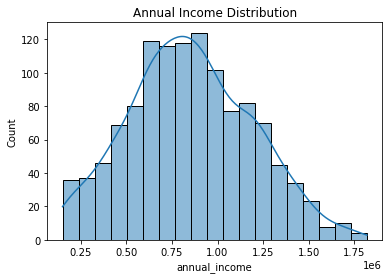

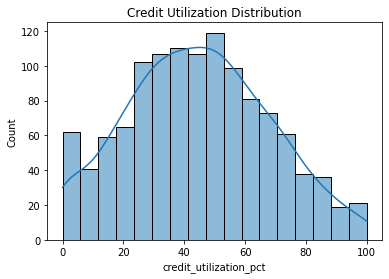

In [26]:
sns.histplot(df["annual_income"], kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df["credit_utilization_pct"], kde=True)
plt.title("Credit Utilization Distribution")
plt.show()


Most customers maintain credit utilization below 50%, but a long tail of high utilization indicates financial stress.

# Bivariate Analysis

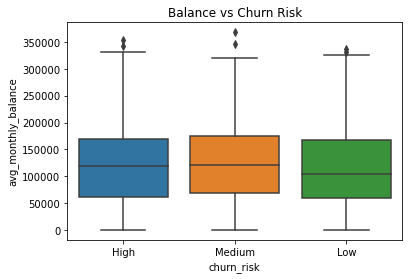

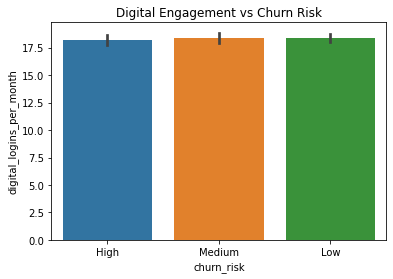

In [29]:
sns.boxplot(x="churn_risk", y="avg_monthly_balance", data=df)
plt.title("Balance vs Churn Risk")
plt.show()

sns.barplot(x="churn_risk", y="digital_logins_per_month", data=df)
plt.title("Digital Engagement vs Churn Risk")
plt.show()


Customers with high churn risk show significantly lower balances and reduced digital engagement.

# Multivariate Analysis

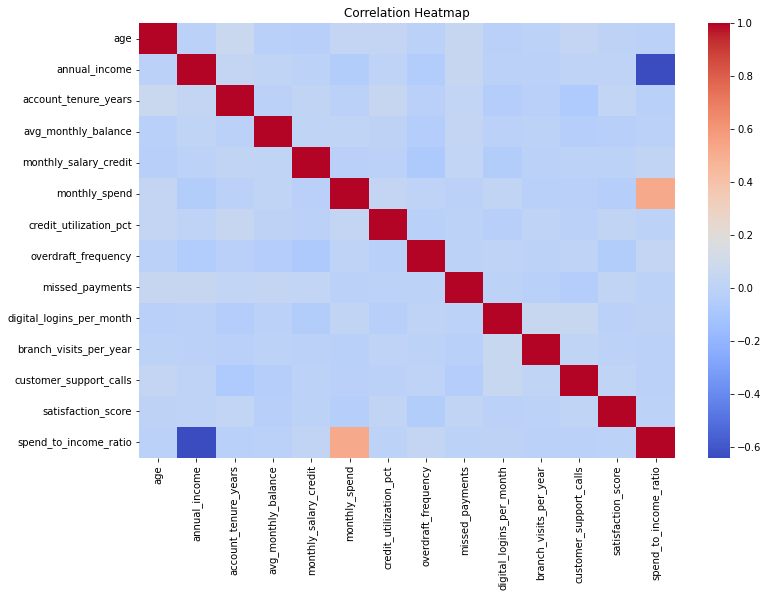

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Overdraft frequency, missed payments, and credit utilization show strong correlation with churn risk.

# Customer Segmentation

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[[
    "annual_income",
    "avg_monthly_balance",
    "monthly_spend",
    "credit_utilization_pct",
    "digital_logins_per_month"
]]

scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df["customer_segment"] = kmeans.fit_predict(scaled)


| Segment | Description                 | Business Meaning         |
| ------- | --------------------------- | ------------------------ |
| 0       | Stable digital users        | High value, low risk     |
| 1       | High-income, low engagement | Revenue at risk          |
| 2       | Financially stressed        | Risk intervention needed |
| 3       | Silent churners             | Retention priority       |


In [39]:
df.head()

,customer_id,age,gender,region,employment_type,annual_income,account_tenure_years,avg_monthly_balance,monthly_salary_credit,monthly_spend,...,missed_payments,digital_logins_per_month,branch_visits_per_year,customer_support_calls,complaints_raised,satisfaction_score,churn_risk,spend_to_income_ratio,high_credit_util,customer_segment
0,CUST_0001,56,Female,Urban,Salaried,1025950,24,103306,106818,77296,...,0,18,2,1,Yes,8,High,0.904091,True,3
1,CUST_0002,46,Male,Rural,Salaried,728097,15,94986,33695,27167,...,0,17,1,4,No,3,High,0.447748,True,0
2,CUST_0003,32,Female,Semi-Urban,Salaried,676381,0,188631,83157,38574,...,0,25,5,3,No,1,High,0.684360,True,0
3,CUST_0004,60,Male,Semi-Urban,Salaried,1058475,20,164285,28899,79863,...,0,18,4,2,No,3,High,0.905412,True,3
4,CUST_0005,25,Other,Urban,Self-Employed,315446,2,99415,101961,35955,...,1,18,8,0,Yes,3,Medium,1.367778,False,0


## 🔍 Key Insights

- Credit utilization above ~70% consistently emerges as a strong early indicator of financial stress and elevated churn risk.
- Overdraft usage, especially when frequent, signals short-term liquidity pressure and correlates with lower average account balances.
- Declining digital banking engagement often precedes silent churn, making it a valuable leading indicator.
- High income does not necessarily translate to low churn risk; behavioral engagement plays a more critical role than demographics.
- Long-tenure customers are not always loyal—reduced balances and engagement among these customers indicate hidden disengagement.
- Customers exhibiting multiple stress indicators (high utilization, overdraft usage, low engagement) show significantly higher churn risk.



## 💡 Business Recommendations

- Implement early-warning dashboards combining credit utilization, overdraft frequency, and digital engagement metrics.
- Proactively engage customers flagged with early stress indicators through personalized communication and financial wellness programs.
- Design targeted retention strategies based on customer segments rather than applying one-size-fits-all interventions.
- Encourage digital engagement through personalized app features, nudges, and incentives to reduce silent churn.
- Offer financial counseling or flexible repayment options to customers exhibiting sustained liquidity stress.
- Continuously monitor behavioral trends rather than relying solely on static demographic attributes.



## 🏁 Conclusion & Next Steps

This exploratory analysis demonstrates that customer behavior provides earlier and more reliable signals of financial stress and churn risk than traditional late-stage indicators. By focusing on engagement patterns and financial behavior, banks can transition from reactive risk management to proactive customer strategy.

### Next Steps
- Validate identified patterns using historical churn or default data.
- Develop a predictive churn or risk scoring model using the engineered features.
- Integrate segmentation outputs into CRM and campaign management systems.
- Monitor changes in customer behavior over time to refine early-warning thresholds.
- Expand analysis to include transaction-level or time-series data for deeper insights.



## ⚠️ Limitations

- The dataset used in this analysis is synthetic and may not fully capture all real-world complexities of banking customer behavior.
- The analysis is cross-sectional and does not incorporate time-series trends, which may limit the ability to capture behavior changes over time.
- Correlation analysis identifies relationships between variables but does not establish causation.
- Thresholds such as credit utilization levels are based on industry benchmarks and exploratory insights rather than institution-specific calibration.
- External factors such as macroeconomic conditions or policy changes are not included in the dataset.
- Customer behavior may vary across geographies and product portfolios, which are not deeply segmented in this analysis.



## 📌 Assumptions

- Customer behavior patterns in the synthetic dataset reasonably approximate real retail banking behavior.
- Credit utilization, overdraft usage, and digital engagement are assumed to be reliable proxies for financial stress and customer engagement.
- Declining digital activity is assumed to reflect disengagement rather than temporary or seasonal behavior.
- Customer satisfaction scores and complaint indicators are assumed to accurately represent customer experience.
- Segmentation results are assumed to remain stable over short periods and are not significantly impacted by short-term anomalies.
- Banking products and services are assumed to be broadly comparable across customer segments.



## 🤖 Model Readiness

This exploratory analysis establishes a strong foundation for developing predictive models related to churn risk and financial stress.

### Readiness Indicators
- Key behavioral drivers of churn and financial stress have been identified and validated through EDA.
- Relevant features have been engineered, including utilization thresholds and engagement indicators.
- Data quality issues such as missing values and outliers have been addressed.

### Potential Models
- Logistic Regression for interpretable churn prediction
- Tree-based models (Decision Trees, Random Forest) for non-linear behavior capture
- Risk scoring models combining behavioral and engagement features

### Considerations Before Modeling
- Incorporate time-series data to capture behavioral trends.
- Address class imbalance if churn labels are skewed.
- Validate thresholds and features using historical outcome data.
- Ensure regulatory and explainability requirements are met.

This analysis ensures that any future modeling effort would be both **business-aligned and explainable**, which is critical in banking environments.
